
# Assignment 2 for Course 1MS041
Make sure you pass the `# ... Test` cells and
 submit your solution notebook in the corresponding assignment on the course website. You can submit multiple times before the deadline and your highest score will be used.

---
## Assignment 2, PROBLEM 1
Maximum Points = 8


A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city. The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals. The locations are divided into three regions: downtown, the suburbs, and the countryside. The following table shows the probabilities of a truck transitioning between these regions at each time step:

| Current region | Probability of transitioning to downtown | Probability of transitioning to the suburbs | Probability of transitioning to the countryside |
|----------------|--------------------------------------------|-----------------------------------------------|------------------------------------------------|
| Downtown       | 0.3                                      | 0.4                                           | 0.3                                            |
| Suburbs        | 0.2                                      | 0.5                                           | 0.3                                            |
| Countryside    | 0.4                                      | 0.3                                           | 0.3                                            |

1. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region after two time steps? [1.5p]
2. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region **the first time** after two time steps? [1.5p]
3. Is this Markov chain irreducible? [1.5p]
4. What is the stationary distribution? [1.5p]
5. Advanced question: What is the expected number of steps until the first time one enters the downtown region having started in the suburbs region. Hint: to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 30. [2p]



In [1]:
# Part 1

# Fill in the answer to part 1 below as a decimal number

prob_map = {
    'D': {'D': 0.3, 'S': 0.4, 'C': 0.3},
    'S': {'D': 0.2, 'S': 0.5, 'C': 0.3},
    'C': {'D': 0.4, 'S': 0.3, 'C': 0.3}
}

# prob of S -> any(D,S,C) -> D
sum_prob = 0
for key in ['D', 'S', 'C']:
    scenario_prob = prob_map['S'][key] * prob_map[key]['D']
    sum_prob += scenario_prob

print(sum_prob)
problem1_p1 = sum_prob

0.28


In [2]:
# Part 2

# Fill in the answer to part 2 below as a decimal number

# prob of S -> any(S,C) -> D
sum_prob = 0
for key in ['S', 'C']:
    scenario_prob = prob_map['S'][key] * prob_map[key]['D']
    sum_prob += scenario_prob

#print(sum_prob)
problem1_p2 = sum_prob

In [9]:
# Part 3

# Fill in the answer to part 3 below as a boolean

# Is this Markov chain irreducible?
# To be irreducible, every state has to be reachable from every other state
# > As there is no 0.0 probability, every state is reachable from every other state.
problem1_irreducible = True

In [3]:
# Part 4

# Fill in the answer to part 4 below
# the answer should be a numpy array of length 3
# make sure that the entries sums to 1!

import numpy as np

# What is the stationary distribution?
problem1_stationary = np.array([13/45, 37/90, 3/10])

In [7]:
# Part 5

# Fill in the answer to part 5 below
# That is, the expected number of steps as a decimal number

# expected number of steps taken for: S -> any(S,C) -> ... -> any(S,C) -> D
# sum(X*P(X)), where X is the number of steps needed to be in D

number_of_steps = 25
expected_steps = 0

def calc_prob(step, pos, prob):    
    if step == 1:
        return prob*prob_map[pos]['D']

    prob_of_S = calc_prob(step-1, 'S', prob*prob_map[pos]['S'])
    prob_of_C = calc_prob(step-1, 'C', prob*prob_map[pos]['C'])
    return prob_of_S+prob_of_C

# S -> S -> D => A prob = prob(S->S)*prob(S->D)
# S -> C -> D => B prob = prob(S->C)*prob(C->D)
# prob_of_D: A prob + B prob

for step in range(1,number_of_steps+1):
    prob_of_D = calc_prob(step, 'S', 1.0)
    print(f'{step}th step prob: {prob_of_D}')
    expected_steps += step*prob_of_D
print(expected_steps)

problem1_ET = expected_steps

1th step prob: 0.2
2th step prob: 0.22
3th step prob: 0.16399999999999998
4th step prob: 0.118
5th step prob: 0.08456
6th step prob: 0.060568
7th step prob: 0.0433808
8th step prob: 0.031070559999999997
9th step prob: 0.0222536
10th step prob: 0.0159386464
11th step prob: 0.01141570112
12th step prob: 0.008176242112
13th step prob: 0.0058560516224
14th step prob: 0.0041942667712
15th step prob: 0.0030040503196159998
16th step prob: 0.0021515842494207998
17th step prob: 0.00154102438035968
18th step prob: 0.0011037244493224958
19th step prob: 0.0007905180966364159
20th step prob: 0.000566191010349783
21th step prob: 0.0004055217224816414
22th step prob: 0.0002904459173643261
23th step prob: 0.0002080254305425624
24th step prob: 0.00014899358939219037
25th step prob: 0.00010671334568119854
3.8384712199780293


---
## Assignment 2, PROBLEM 2
Maximum Points = 4


Use the **Multi-dimensional Constrained Optimisation** example (in `07-Optimization.ipynb`) to numerically find the MLe for the mean and variance parameter based on `normallySimulatedDataSamples`, an array obtained by a specific simulation of $30$ IID samples from the $Normal(10,2)$ random variable.

Recall that $Normal(\mu, \sigma^2)$ RV has the probability density function given by:

$$
f(x ;\mu, \sigma) = \displaystyle\frac{1}{\sigma\sqrt{2\pi}}\exp\left(\frac{-1}{2\sigma^2}(x-\mu)^2\right)
$$

The two parameters, $\mu \in \mathbb{R} := (-\infty,\infty)$ and $\sigma \in (0,\infty)$, are sometimes referred to as the location and scale parameters.

You know that the log likelihood function for $n$ IID samples from a Normal RV with parameters $\mu$ and $\sigma$ simply follows from $\sum_{i=1}^n \log(f(x_i; \mu,\sigma))$, based on the IID assumption. 

NOTE: When setting bounding boxes for $\mu$ and $\sigma$ try to start with some guesses like $[-20,20]$ and $[0.1,5.0]$ and make it larger if the solution is at the boundary. Making the left bounding-point for $\sigma$ too close to $0.0$ will cause division by zero Warnings. Other numerical instabilities can happen in such iterative numerical solutions to the MLe. You need to be patient and learn by trial-and-error. You will see the mathematical theory in more details in a future course in scientific computing/optimisation. So don't worry too much now except learning to use it for our problems.  

In [8]:

import numpy as np
from scipy import optimize
# do NOT change the next three lines
np.random.seed(123456) # set seed
# simulate 30 IID samples drawn from Normal(10,2)RV
normallySimulatedDataSamples = np.random.normal(10,2,30) 

import math

# define the negative log likelihoo function you want to minimise by editing XXX
def negLogLklOfIIDNormalSamples(parameters):
    '''return the -log(likelihood) of normallySimulatedDataSamples with mean and var parameters'''
    mu_param=parameters[0]
    sigma_param=parameters[1]
    
    #print('mu', mu_param)
    #print('sigma', sigma_param)

    f = lambda x: 1/(sigma_param*math.sqrt(2*math.pi)) * math.exp(-1/(2*(sigma_param**2))*((x-mu_param)**2))
    neg_log = 0
    for i in range(30):
        #print(f'{i} - x:{data[i]} f(x)={f(data[i])}')
        neg_log -= math.log(f(normallySimulatedDataSamples[i]))

    return neg_log

# you should only change XXX below and not anything else
parameter_bounding_box=((-20, 20), (0.1, 2.0)) # specify the constraints for each parameter - some guess work...
initial_arguments = np.array([0.5, 0.5]) # point in 2D to initialise the minimize algorithm
result_problem2_opt = optimize.minimize(negLogLklOfIIDNormalSamples, initial_arguments, bounds=parameter_bounding_box) 
# call the minimize method above finally! you need to play a bit to get initial conditions and bounding box ok
result_problem2_opt


  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 58.631387282369666
        x: [ 9.269e+00  1.708e+00]
      nit: 11
      jac: [ 9.237e-06  1.421e-06]
     nfev: 36
     njev: 12
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

---
## Assignment 2, PROBLEM 3
Maximum Points = 4



Derive the maximum likelihood estimate for $n$ IID samples from a random variable with the following probability density function:
$$
f(x; \lambda) = \frac{1}{24} \lambda^5 x^4 \exp(-\lambda x), \qquad \text{ where, } \lambda>0, x > 0
$$

You can solve the MLe by hand (using pencil paper or using key-strokes). Present your solution as the return value of a function called `def MLeForAssignment2Problem3(x)`, where `x` is a list of $n$ input data points.

In [1]:
# do not change the name of the function, just replace XXX with the appropriate expressions for the MLe
def MLeForAssignment2Problem3(x):
    '''Calculates lambda, that maximizes the likelihood'''
    
    l = 5*len(x) / sum(x)
    return l

---
## Assignment 2, PROBLEM 4
Maximum Points = 8


## Random variable generation and transformation

The purpose of this problem is to show that you can implement your own sampler, this will be built in the following three steps:

1. [2p] Implement a Linear Congruential Generator where you tested out a good combination (a large $M$ with $a,b$ satisfying the Hull-Dobell (Thm 6.8)) of parameters. Follow the instructions in the code block.
2. [2p] Using a generator construct random numbers from the uniform $[0,1]$ distribution.
3. [4p] Using a uniform $[0,1]$ random generator, generate samples from 

$$p_0(x) = \frac{\pi}{2}|\sin(2\pi x)|, \quad x \in [0,1] \enspace .$$

Using the **Accept-Reject** sampler (**Algorithm 1** in TFDS notes) with sampling density given by the uniform $[0,1]$ distribution.

In [3]:
def problem4_LCG(size=None, seed = 0):
    """
    A linear congruential generator that generates pseudo random numbers according to size.
    
    Parameters
    -------------
    size : an integer denoting how many samples should be produced
    seed : the starting point of the LCG, i.e. u0 in the notes.
    
    Returns
    -------------
    out : a list of the pseudo random numbers
    """
    
    u = seed

    a = 75
    b = 74
    M = 2**16 + 1

    D = lambda x: (a*x + b) % M

    random_numbers = []
    for _ in range(size):
        u = D(u)
        random_numbers.append(u)
    return random_numbers

In [5]:

def problem4_uniform(generator=None, period = 1, size=None, seed=0):
    """
    Takes a generator and produces samples from the uniform [0,1] distribution according
    to size.
    
    Parameters
    -------------
    generator : a function of type generator(size,seed) and produces the same result as problem1_LCG, i.e. pseudo random numbers in the range {0,1,...,period-1}
    period : the period of the generator
    seed : the seed to be used in the generator provided
    size : an integer denoting how many samples should be produced
    
    Returns
    --------------
    out : a list of the uniform pseudo random numbers
    """
    
    random_numbers = generator(size, seed)
    random_numbers = [n/(period-1) for n in random_numbers]
    return random_numbers

In [11]:
import math
def problem4_accept_reject(uniformGenerator=None, n_iterations=None, seed=0):
    """
    Takes a generator that produces uniform pseudo random [0,1] numbers 
    and produces samples from (pi/2)*abs(sin(x*2*pi)) using an Accept-Reject
    sampler with the uniform distribution as the proposal distribution.
    Runs n_iterations
    
    Parameters
    -------------
    generator : a function of the type generator(size,seed) that produces uniform pseudo random
    numbers from [0,1]
    seed : the seed to be used in the generator provided
    n_iterations : an integer denoting how many attempts should be made in the accept-reject sampler
    
    Returns
    --------------
    out : a list of the pseudo random numbers with the specified distribution
    """

    # input
    M = 1_000
    target_density = lambda x: (math.pi/2) * abs(math.sin(x*2*math.pi))
    sampling_density = uniformGenerator(n_iterations, seed)
    
    samples = []
    x = sampling_density[0]
    for i in range(n_iterations):
        x = sampling_density[i]
        r = target_density(x) / (M*sampling_density[i])
        #print(seed)
        U = uniformGenerator(1, seed)[0]
        #print(U)
        if U <= r:
            samples.append(x)   
    return samples

---
#### Local Test for Assignment 2, PROBLEM 4
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [12]:

# If you managed to solve all three parts you can test the following code to see if it runs
# you have to change the period to match your LCG though, this is marked as XXX.
# It is a very good idea to check these things using the histogram function in sagemath
# try with a larger number of samples, up to 10000 should run

print("LCG output: %s" % problem4_LCG(size=10, seed = 1))

period = 2**16 + 1

print("Uniform sampler %s" % problem4_uniform(generator=problem4_LCG, period = period, size=10, seed=1))

uniform_sampler = lambda size,seed: problem4_uniform(generator=problem4_LCG, period = period, size=size, seed=seed)

print("Accept-Reject sampler %s" % problem4_accept_reject(uniformGenerator = uniform_sampler,n_iterations=20,seed=1))


LCG output: [149, 11249, 57305, 38044, 35283, 24819, 26463, 18689, 25472, 9901]
Uniform sampler [0.0022735595703125, 0.1716461181640625, 0.8744049072265625, 0.58050537109375, 0.5383758544921875, 0.3787078857421875, 0.4037933349609375, 0.2851715087890625, 0.388671875, 0.1510772705078125]
Accept-Reject sampler [0.0022735595703125, 0.1716461181640625, 0.3787078857421875, 0.2851715087890625, 0.388671875, 0.1510772705078125, 0.331756591796875, 0.18817138671875, 0.11376953125, 0.0296630859375, 0.225830078125, 0.360626220703125, 0.0476837158203125]


Accept-Reject sampler []


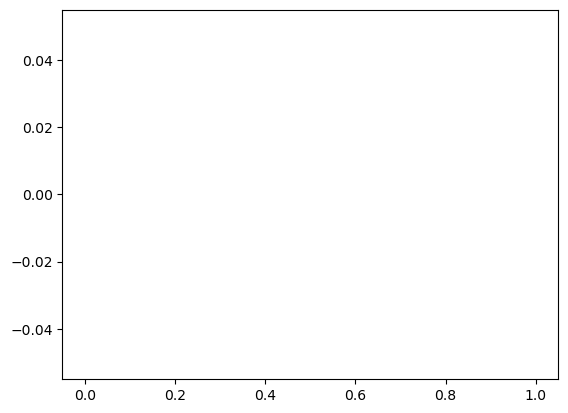

In [15]:

# If however you did not manage to implement either part 1 or part 2 but still want to check part 3, you can run the code below
import matplotlib.pyplot as plt 
def testUniformGenerator(size,seed):
    import random
    random.seed(seed)
    
    return [random.uniform(0,1) for s in range(size)]

print("Accept-Reject sampler %s" % problem4_accept_reject(uniformGenerator=testUniformGenerator, n_iterations=20, seed=1))
values = problem4_accept_reject(uniformGenerator=testUniformGenerator, n_iterations = 1000000, seed=1)
_ = plt.hist(values, bins = 30)